# Tarea 3

### Marcelino Sánchez Rodríguez
### 12 de marzo de 2023

In [4]:
# Load necessary packages
library(rstan)
library(coda)
library(R2jags)
library(methods)

# set the working directory

setwd("/home/rstudio/tarea2RegAvanz")

#--- Funciones utiles ---
prob<-function(x){
  out<-min(length(x[x>0])/length(x),length(x[x<0])/length(x))
  out
}

source("/home/rstudio/tarea2RegAvanz/claseNietor6.R")

## Configuramos para comparar los distintos modelos

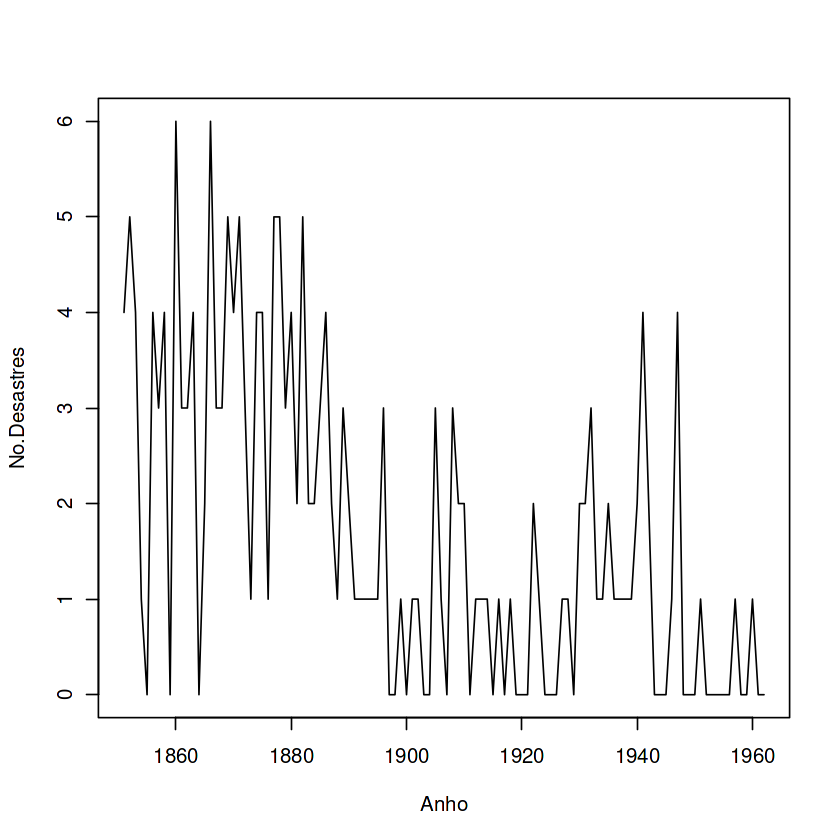

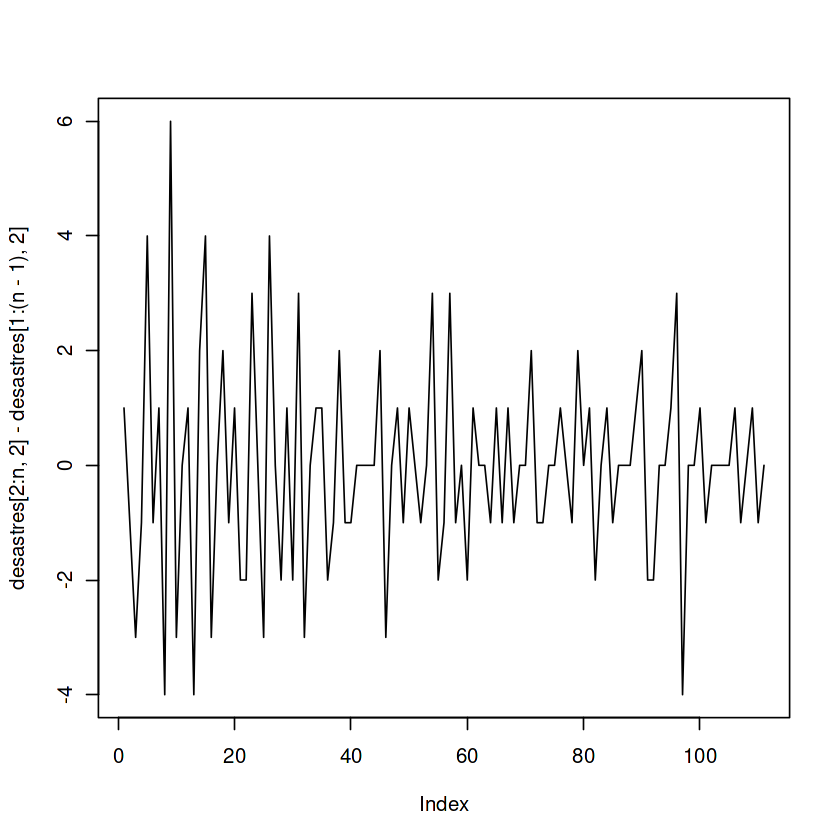

In [9]:
#-Reading data-
desastres<-read.table("http://gente.itam.mx/lnieto/index_archivos/desastres.txt",header=TRUE)
n<-nrow(desastres)
plot(desastres,type="l")
plot(desastres[2:n,2]-desastres[1:(n-1),2],type="l")

#-Defining data-
data<-list("n"=n,"y"=desastres$No.Desastres,"x"=desastres$Anho)
data2<-list("n"=n,"y"=c(desastres$No.Desastres[1:(n-6)],rep(NA,6)),"x"=desastres$Anho)
data3<-list("n"=n,"y"=desastres$No.Desastres+0.1,"x"=desastres$Anho/1000)

#-Defining inits-
initsa1<-function(){list(beta=rep(0,2),yf1=rep(1,n))}
initsa2<-function(){list(beta=rep(0,2),aux=1,yf1=rep(1,n))}
initsa3<-function(){list(beta=rep(0,2),a=1,yf1=rep(1,n))}
initsb1<-function(){list(beta=rep(0,2),aux2=1,yf1=rep(1,n))}
initsb2<-function(){list(beta=rep(0,2),aux=1,aux2=1,yf1=rep(1,n))}
initsb3<-function(){list(beta=rep(0,2),a=1,aux2=1,yf1=rep(1,n))}
initsc<-function(){list(beta=rep(0,n),tau.b=1,yf1=rep(1,n))}
initsd<-function(){list(mu=rep(1,n),tau.b=1,yf1=rep(1,n))}

#-Selecting parameters to monitor-
parsa1<-c("beta","yf1","mu")
parsa2<-c("beta","yf1","mu","r")
parsa3<-c("beta","yf1","mu","a")
parsb1<-c("beta","yf1","mu","tau")
parsb2<-c("beta","yf1","mu","tau","r")
parsb3<-c("beta","yf1","mu","tau","a")
parscd<-c("tau.b","yf1","mu")


# Modelo 1

In [13]:
#corremos código

modelCode1 <- 'model
{
#Likelihood
for (i in 1:n) {
#Poisson
	y[i] ~ dpois(mu[i])
	log(mu[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }

#Prediction 1
#Poisson
for (i in 1:n) { yf1[i] ~ dpois(mu[i]) }

}'

ej6a1.sim <- jagsModel$new(data, initsa1, parsa1, modelCode1,n.thin=2, n.iter=10000, n.burnin=1000, n.chains=2)

ej6a1.sim$runJagsModel()

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 112
   Unobserved stochastic nodes: 114
   Total graph size: 677

Initializing model



## Checamos Convergencia

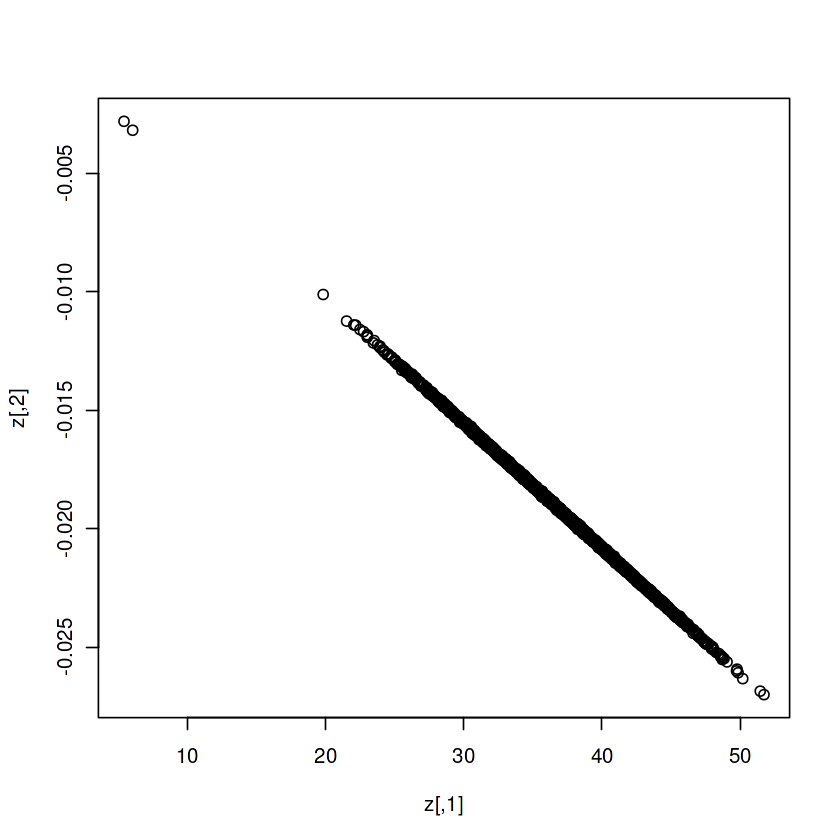

                 mean          sd         2.5%          25%          50%
beta[1]   36.03983065 4.788790972  26.92024795  32.76039444  35.96070142
beta[2]   -0.01872796 0.002532837  -0.02370859  -0.02043637  -0.01867716
deviance 344.88325626 2.740593269 342.84712895 343.40615908 344.25558731
mu[1]      3.98293307 0.489565041   3.12260767   3.64879834   3.94780424
mu[2]      3.90807406 0.472499317   3.07313879   3.58308821   3.87563056
mu[3]      3.83464636 0.455984824   3.02822491   3.52076124   3.80360484
mu[4]      3.76262214 0.440008839   2.98367600   3.45919552   3.73370068
mu[5]      3.69197415 0.424559030   2.93918915   3.40007082   3.66173190
mu[6]      3.62267565 0.409623451   2.89176124   3.34072870   3.59562581
mu[7]      3.55470043 0.395190529   2.84892894   3.28050247   3.52962474
mu[8]      3.48802282 0.381249058   2.80747819   3.22362238   3.46636379
mu[9]      3.42261764 0.367788190   2.76389292   3.16898678   3.40248477
mu[10]     3.35846020 0.354797427   2.72072047   3.

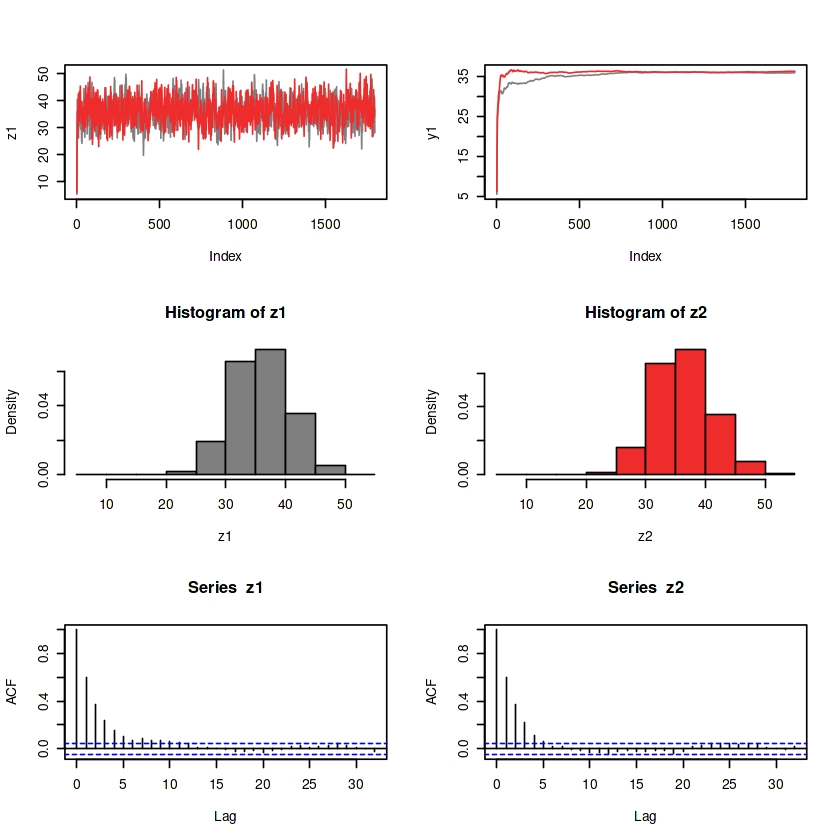

In [11]:
ej6a1.sim$viewSpace()

ej6a1.sim$graphConvergence()

ej6a1.sim$summaryModel()

ej6a1.sim$dicModelfunc()

## Analizamos modelo

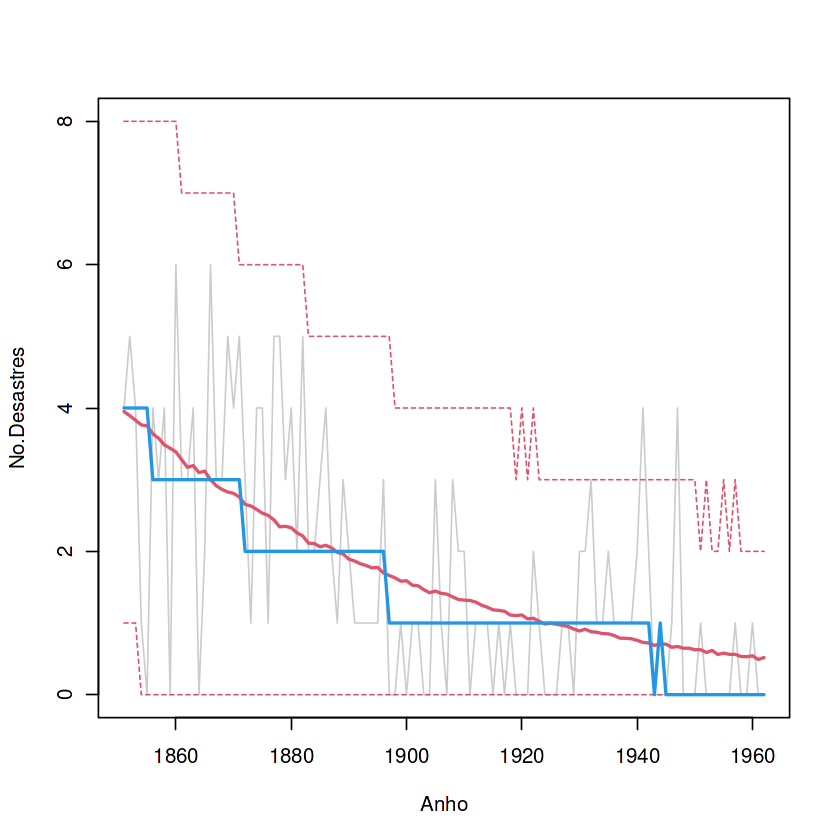

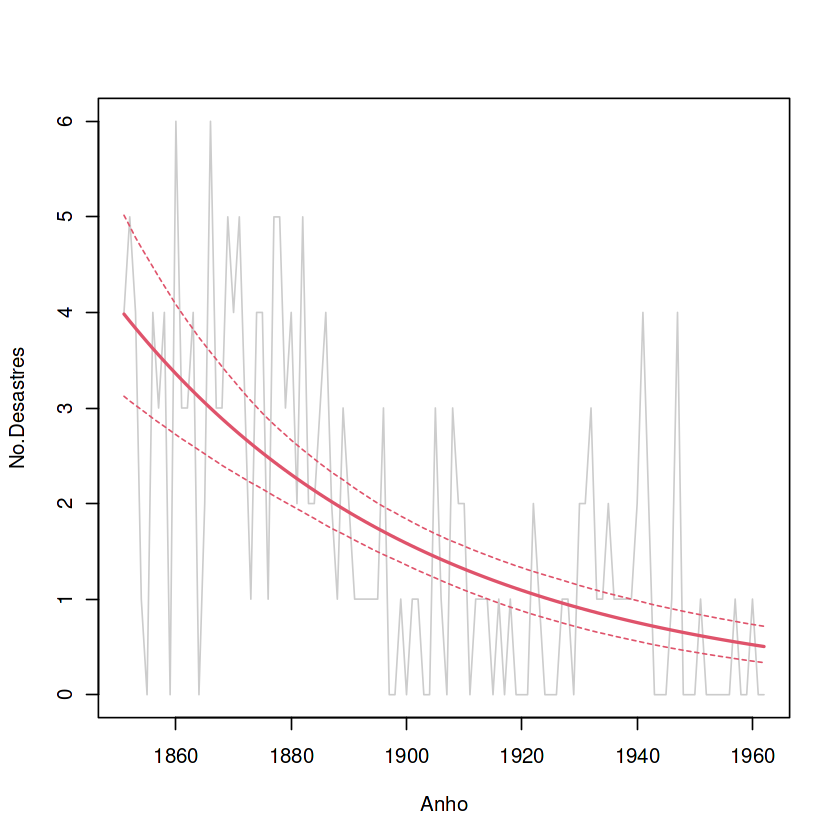

In [12]:
sextoGrafPred(ej6a1.sim)

sextoGrafMedia(ej6a1.sim)